In [29]:
import pandas as pd
loc27= pd.read_csv('27-17.01.29-02.04.csv')
print(loc27)

     Unnamed: 0   Unnamed: 1          Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                 NaN        NaN   
1           NaN     SITE NO:  27 - Harrison Park        NaN   
2           NaN        Date:            29/01/17        NaN   
3           NaN   Direction:                            NaN   
4           NaN          NaN                 NaN        NaN   
5           NaN         Hour                 P/C    P/C Kph   
6           NaN  00.00-00.59                   0          0   
7           NaN  01.00-01.59                   0          0   
8           NaN  02.00-02.59                   1         12   
9           NaN  03.00-03.59                   0          0   
10          NaN  04.00-04.59                   0          0   
11          NaN  05.00-05.59                   1         15   
12          NaN  06.00-06.59                   0          0   
13          NaN  07.00-07.59                   4         15   
14          NaN  08.00-08.59                   3       

In [30]:
loc27 = loc27.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Harrison Park - DAILY FLOW BY HOUR')
loc27.drop(loc27.index[[0,1,2,3,4,5]], inplace=True)
loc27.drop(loc27.columns[[0,5]], axis=1, inplace=True)
loc27.index = loc27.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc27.rename(columns=newcols, inplace=True)
loc27

Harrison Park - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,1
1,01.00-01.59,0,0,0
2,02.00-02.59,1,12,0
3,03.00-03.59,0,0,0
4,04.00-04.59,0,0,0
5,05.00-05.59,1,15,0
6,06.00-06.59,0,0,0
7,07.00-07.59,4,15,0
8,08.00-08.59,3,17,0
9,09.00-09.59,8,13,0


In [31]:
loc27['Hourstarts'] = loc27.Hour.str.split('-').str.get(0)
loc27['Hourends'] = loc27.Hour.str.split('-').str.get(1)
loc27.drop(loc27.columns[0], axis=1, inplace=True)

In [32]:
loc27.to_csv('Loc26.csv')
loc27 = loc27.dropna(how='all')
loc27 = loc27[loc27.Hourstarts != "Direction:"]
loc27 = loc27[loc27.Hourstarts != "Total"]
loc27 = loc27[loc27.Hourstarts != "Hour"]
loc27 = loc27[loc27.Hourstarts != "Date:"]

In [33]:
pd.options.mode.chained_assignment = None

In [34]:
loc27[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc27[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [35]:
loc27day1 = loc27.iloc[0:24]
loc27day2 = loc27.iloc[24:48]
loc27day3 = loc27.iloc[48:72]
loc27day4 = loc27.iloc[72:96]
loc27day5 = loc27.iloc[96:120]
loc27day6 = loc27.iloc[120:144]
loc27day7 = loc27.iloc[144:168]
#my data is divided into 7 clean sets

In [36]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

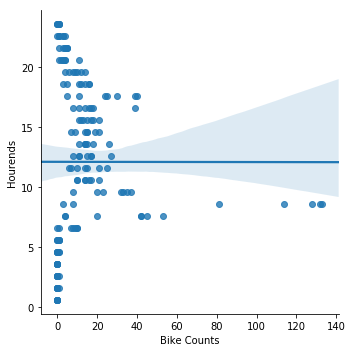

In [37]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27)

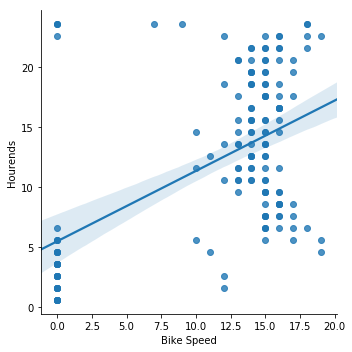

In [38]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27)

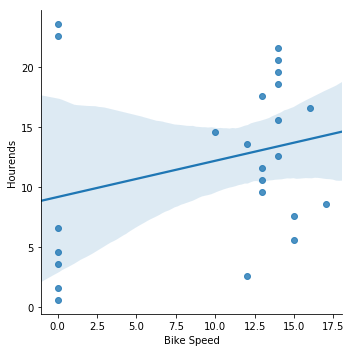

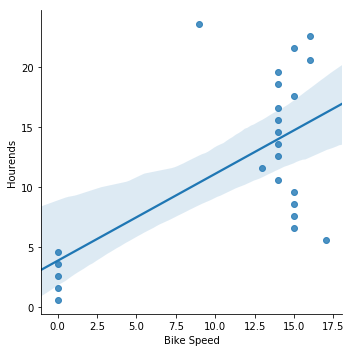

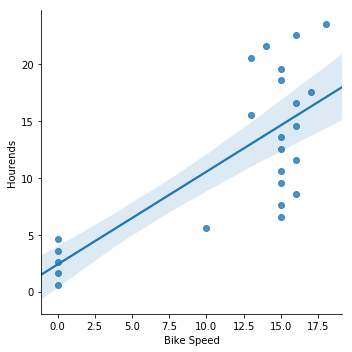

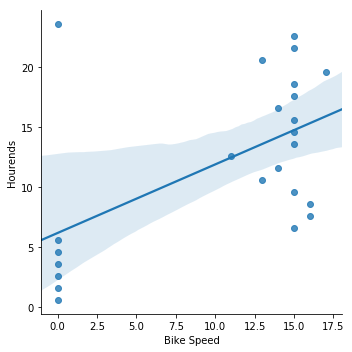

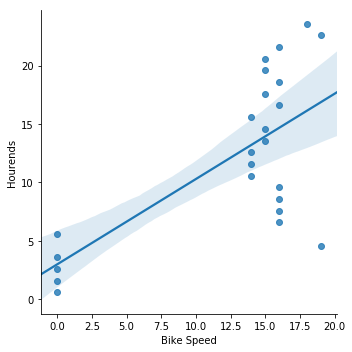

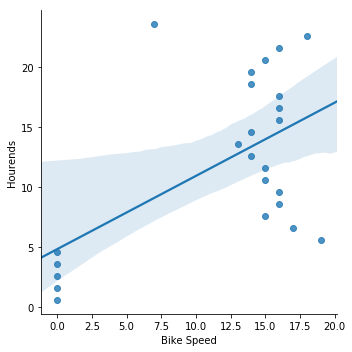

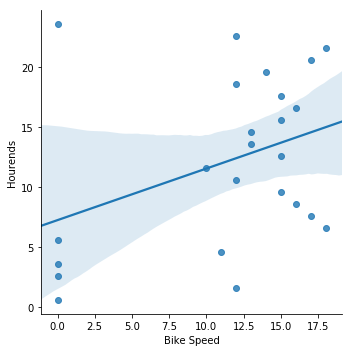

In [39]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc27day7)

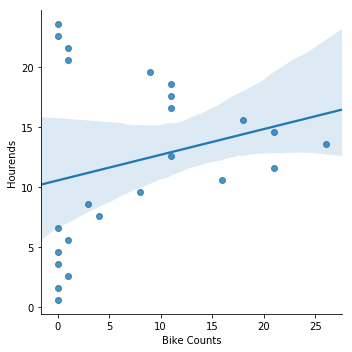

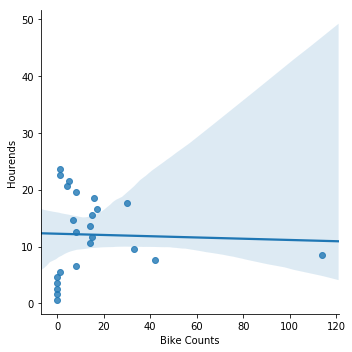

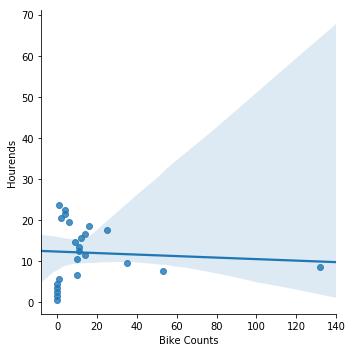

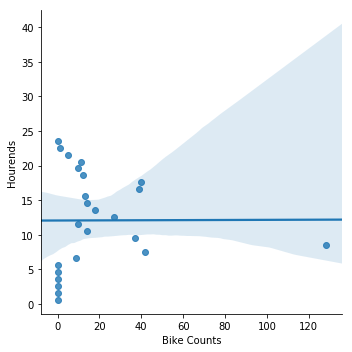

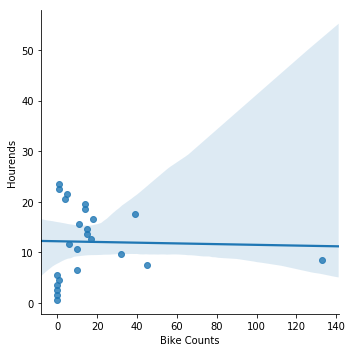

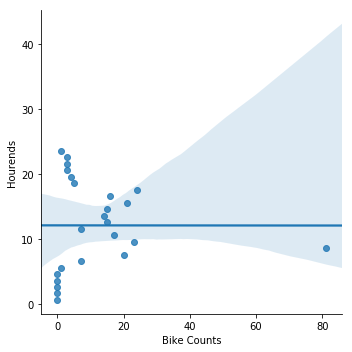

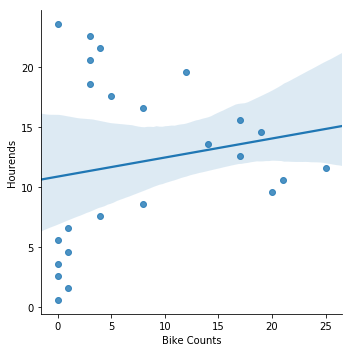

In [40]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc27day7)